This project aims to classify the position of a football player (Male) relating to "EA FC 24" which was scraped into a dataset and was shared on Kaggle.

I will be attempting the calssification using (K Nearest Neighbor) KNN algorithim .


The Classification will be considered on players with equal dimensions (Stats in this case) ...

 A player will have the following stats 

[Position	   Age	   Overall (what we want to classify)	Pace	Shooting	 Passing	Dribbling	Defending	Physicality	Acceleration	 Sprint 	Positioning	  Finishing	   Shot	   Long	  Volleys	Penalties	Vision	Crossing	  Free  	Curve	Agility	Balance	Reactions	Ball	Composure	Interceptions	Heading	Def	Standing	Sliding  	Jumping	  Stamina	  Strength  	Aggression	 Weak foot Skill moves GK] 

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [57]:
players = pd.read_csv("male_players csv")
print(players.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           15845 non-null  object 
 1   Position       15845 non-null  object 
 2   Age            15845 non-null  int64  
 3   Overall        15845 non-null  int64  
 4   Pace           15845 non-null  int64  
 5   Shooting       15845 non-null  int64  
 6   Passing        15845 non-null  int64  
 7   Dribbling      15845 non-null  int64  
 8   Defending      15845 non-null  int64  
 9   Physicality    15845 non-null  int64  
 10  Acceleration   15845 non-null  int64  
 11  Sprint         15845 non-null  int64  
 12  Positioning    15845 non-null  int64  
 13  Finishing      15845 non-null  int64  
 14  Shot           15845 non-null  int64  
 15  Long           15845 non-null  int64  
 16  Volleys        15845 non-null  int64  
 17  Penalties      15845 non-null  int64  
 18  Vision

In [58]:
# What is the number of players that are recorded?

print(f"{len(players)} players") 

15845 players


In [59]:
players.columns

Index(['Name', 'Position', 'Age', 'Overall', 'Pace', 'Shooting', 'Passing',
       'Dribbling', 'Defending', 'Physicality', 'Acceleration', 'Sprint',
       'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties',
       'Vision', 'Crossing', 'Free', 'Curve', 'Agility', 'Balance',
       'Reactions', 'Ball', 'Composure', 'Interceptions', 'Heading', 'Def',
       'Standing', 'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'GK'],
      dtype='object')

In [60]:
# Lets find the basic statistic summaries for the base stats + the age

players[["Age","Overall","Pace","Shooting","Passing","Dribbling","Physicality"]].describe()

,Age,Overall,Pace,Shooting,Passing,Dribbling,Physicality
count,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,25.848659,66.321174,68.133481,54.140738,58.532281,56.299085,65.456990
std,4.677433,6.685503,10.721206,13.716321,9.595001,18.827593,9.567424
min,17.000000,47.000000,27.000000,19.000000,25.000000,5.000000,29.000000
25%,22.000000,62.000000,62.000000,44.000000,52.000000,51.000000,59.000000
50%,25.000000,66.000000,69.000000,57.000000,59.000000,62.000000,66.000000
75%,29.000000,70.000000,75.000000,64.000000,65.000000,68.000000,72.000000
max,43.000000,91.000000,97.000000,93.000000,94.000000,96.000000,90.000000


In [61]:
# Are there any missing values?
players.isna().any()

Name             False
Position         False
Age              False
Overall          False
Pace             False
Shooting         False
Passing          False
Dribbling        False
Defending        False
Physicality      False
Acceleration     False
Sprint           False
Positioning      False
Finishing        False
Shot             False
Long             False
Volleys          False
Penalties        False
Vision           False
Crossing         False
Free             False
Curve            False
Agility          False
Balance          False
Reactions        False
Ball             False
Composure        False
Interceptions    False
Heading          False
Def              False
Standing         False
Sliding          False
Jumping          False
Stamina          False
Strength         False
Aggression       False
Weak foot        False
Skill moves      False
GK                True
dtype: bool

In [96]:
# The missing field related to the goalkeeping ability as all positions (excluding the Goal keeper) do not require it.
# This means that the data is "Not Missing At Random" or NMAR, therefore the data is logically missing.
# The easiest way is to evaluate it as 0 (assuming that the player actually has no goal keeping capabilities)

players.fillna({'GK':0},inplace=True)
players.GK.isna().any()

False

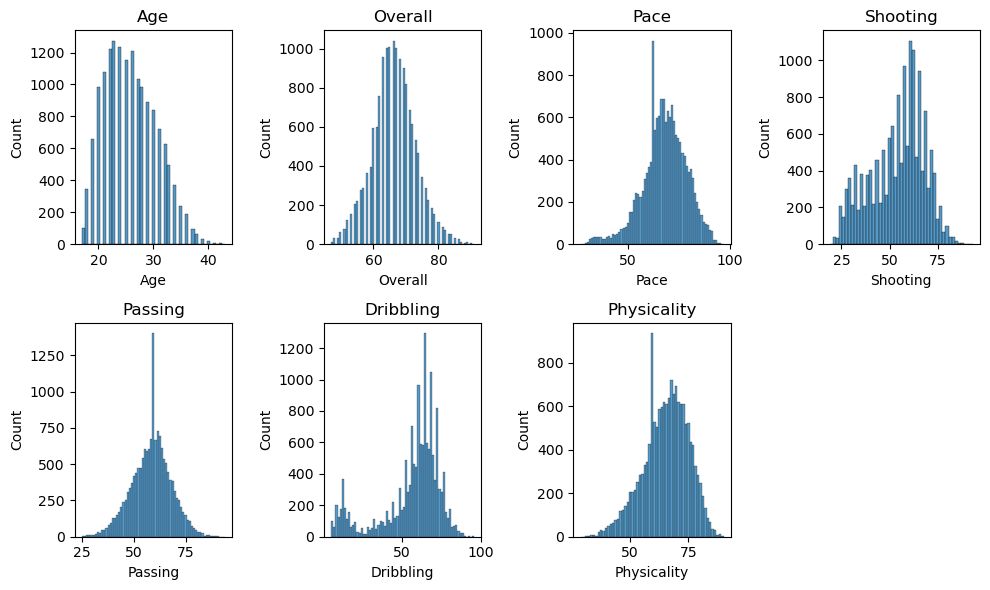

<Figure size 640x480 with 0 Axes>

In [119]:
# We will look at the distribution of ages and overall stats
variables = ["Age","Overall","Pace","Shooting","Passing","Dribbling","Physicality"]

# Create a figure and axis objects
fig, axs = plt.subplots(2, 4, figsize=(10, 6))

axs = axs.flatten()

# Loops through each variable and plot
for i, var in enumerate(variables):
    sns.histplot(players[var], ax=axs[i])
    axs[i].set_title(var)

# Hides the empty subplots in the last row
for j in range(len(variables), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
plt.clf()
    

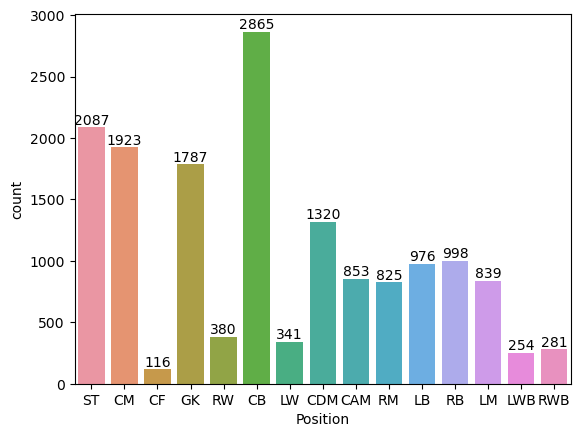

<Figure size 640x480 with 0 Axes>

In [132]:
# Checking the position column as well

ax = sns.countplot(x = "Position",data = players)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The conversion will be as follows:


The scikit-learn's KNN implementation uses Euclidean Distance fromula to calculate distances between dimensions of objects

The General Formula :
                            d = ((a1 - b1)^2 + (a2 - b2)^2  + ........ + (an - bn)^2)^(1/2)        
                            
                              eq. Euclidean distance between two "objects" for n dimensions  (Both are obligated to have the same dimensions)


Another metric envolves using Manhattan Distance formula 

The General Formula:
                            d = |a1 - b1| + |a2 - b2| + ........ + |an - bn|

                            eq. Manhattan distance between two "objects" for n dimensions  (Both are obligated to have the same dimensions)

In [73]:
Stats = players[
  ["Overall","Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality",
  "Acceleration", "Sprint", "Positioning", "Finishing", "Shot", "Long", "Volleys", "Penalties",
  "Vision", "Crossing", "Free", "Curve", "Agility", "Balance", "Reactions", "Ball",
  "Composure", "Interceptions", "Heading", "Def", "Standing", "Sliding", "Jumping", "Stamina",
  "Strength", "Aggression", "Weak foot", "Skill moves", "GK"]
]

Position = players['Position']


x_train,x_test,y_train,y_test = train_test_split(Stats,Position,test_size = 0.2, random_state=100)

model =KNeighborsClassifier(15)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [74]:
model.score(np.array(x_train),np.array(y_train))

E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6935153045124645

In [77]:
y_pred = model.predict(np.array(x_test)) # Make predictions
    
# Calculate MSE and R2
mse = mean_squared_error(np.array(y_test), np.array(y_pred))
r2 = r2_score(np.array(y_test), np.array(y_pred))

print(f"mse: {mse} , r2: {r2} \n train_score: {score_tr} , test_score: {score_test}")

E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'CAM'